# Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer

In [2]:
fires = pd.read_csv('../data/forestfires.csv')
fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


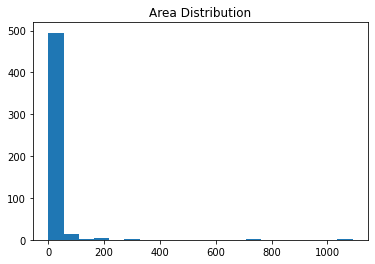

In [3]:
plt.hist(fires.area, bins=20)
plt.title('Area Distribution')
plt.show()

Очистка и разделение на обучающую и трен выборку

In [4]:
fires = fires.drop(columns=['X', 'Y'])

months_to_remove = ['nov','jan','may']
fires = fires.drop(fires[fires.month.isin(months_to_remove)].index ,axis=0)

fires['temp_bins'] = pd.cut(fires.temp, bins=[0, 15, 20, 25, 40], include_lowest=True, 
                                 labels=['0-15', '15-20', '20-25', '>25'])

# split into train/test
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(fires.values, fires.temp_bins.values):
    st_train_set = fires.iloc[train_index]
    st_test_set = fires.iloc[test_index]

Подготовка к обучению модели и ее очистка

In [5]:
X_train = st_train_set.drop(columns=['area', 'temp_bins'])
X_train = pd.get_dummies(X_train)
y_train = st_train_set[['area']]

X_test = st_test_set.drop(columns=['area', 'temp_bins'])
X_test = pd.get_dummies(X_test)
y_test = st_test_set[['area']]

model = RandomForestRegressor(max_depth=2, min_samples_split=2, min_samples_leaf=1, random_state=0, n_estimators=100)
model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_test)

# print out the prediction scores
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))
print('R-squared: {}'.format(r2_score(y_test, y_pred)))

RMSE: 80.90378771420649
MAE: 22.520703240785696
R-squared: -0.005152996977448865


Визуализация

Text(0.5, 1.0, 'Predicted vs True values')

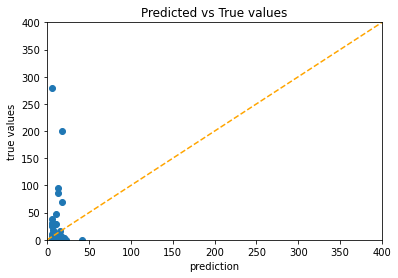

In [6]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(0,400,400), np.linspace(0,400,400), c = 'orange', linestyle='--')
plt.xlabel('prediction')
plt.ylabel('true values')
plt.xlim(0,400)
plt.ylim(0,400)
plt.title('Predicted vs True values')

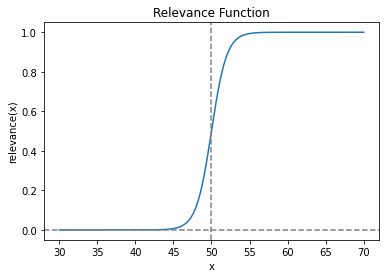

In [7]:
from scipy.special import expit

def relevance(x):
    x = np.array(x)
    return expit(x - 50)

# plot relevance function
plt.plot(np.linspace(30, 70, 1000), relevance(np.linspace(30, 70, 1000)))
plt.title('Relevance Function')
plt.xlabel('x')
plt.axhline(y=0, c='gray', linestyle='--')
plt.axvline(x=50, c='gray', linestyle='--')
plt.ylabel('relevance(x)')
plt.show()

In [8]:
# model and check the results
model = RandomForestRegressor(max_depth=2, min_samples_split=2, min_samples_leaf=1, random_state=0, n_estimators=100)

model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_test)

# print out the prediction scores
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))
print('R-squared: {}'.format(r2_score(y_test, y_pred)))

RMSE: 80.90378771420649
MAE: 22.520703240785696
R-squared: -0.005152996977448865


Как мы видим, модель получилась не самая адекватная, но в целом, работает. Можно побаловаться с другими моделями и получить более хороший результат